# Cluster-based analysis of data on COVID-19 from 'Our World in Data' using K-means methods

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os #It provides operating system operations.

import numpy as np
import pandas as pd
import seaborn as sns

# Where to save results and images
PATH = "../"

RESULTS_PATH = os.path.join(PATH, "results")
os.makedirs(RESULTS_PATH, exist_ok=True)

IMAGES_PATH = os.path.join(PATH, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_csv(data, file_name, index=False):
    path = os.path.join(RESULTS_PATH, file_name + ".csv")
    print("Saving CSV file:", file_name)
    
    data.to_csv(path, index=index)

- Upload of the dataset: Data on COVID-19 (coronavirus) by Our World in Data

In [2]:
data = pd.read_csv('../data/owid-covid-data.csv')
data = pd.DataFrame(data)
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-19,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-02,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276950,ZWE,Africa,Zimbabwe,2023-12-17,266025.0,50.0,25.429,5730.0,0.0,1.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
276951,ZWE,Africa,Zimbabwe,2023-12-24,266048.0,23.0,24.000,5731.0,1.0,1.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
276952,ZWE,Africa,Zimbabwe,2023-12-31,265929.0,NaN,NaN,5724.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
276953,ZWE,Africa,Zimbabwe,2024-01-07,265975.0,46.0,23.857,5727.0,3.0,1.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


### DATA PRE-PROCESSING

- Data cleaning and data transformation

In [3]:
#variables for which there are more undefined values than defined values
def columns_with_more_NaN_values(data):
    more_NaN_values = data.columns[data.isnull().sum() > data.notnull().sum()]
    return data[more_NaN_values]
selected_columns = columns_with_more_NaN_values(data)

#remove the following variables
def remove_selected_columns(data, selected_columns):
    d_w_c = data.drop(columns=selected_columns.columns)
    return d_w_c

d_w_c = remove_selected_columns(data, selected_columns)
d_w_c

,iso_code,continent,location,date,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-12,NaN,NaN,NaN,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-19,NaN,NaN,NaN,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-26,NaN,NaN,NaN,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-02-02,NaN,NaN,NaN,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276950,ZWE,Africa,Zimbabwe,2023-12-17,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
276951,ZWE,Africa,Zimbabwe,2023-12-24,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
276952,ZWE,Africa,Zimbabwe,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
276953,ZWE,Africa,Zimbabwe,2024-01-07,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0


In [4]:
#we identify for each country, if there is at least one value different from NaN for each variable
result = d_w_c.groupby('location').apply(lambda group: group.iloc[:, 4:].notna().any(axis=0).all())
result
#"False" denotes that at least one variable has all missing values for that country

location
Afghanistan       False
Africa            False
Albania            True
Algeria            True
American Samoa    False
                  ...  
Western Sahara    False
World             False
Yemen              True
Zambia             True
Zimbabwe           True
Length: 255, dtype: bool

In [5]:
#grouping countries for which the condition is "False" (countries with at least one variable with all NaN)
paesi_senza_osservazioni = result[~result].index.tolist()
paesi_senza_osservazioni

['Afghanistan',
 'Africa',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Armenia',
 'Aruba',
 'Asia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Botswana',
 'British Virgin Islands',
 'Brunei',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo',
 'Cook Islands',
 "Cote d'Ivoire",
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Dominica',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Germany',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'High income',
 'Honduras',
 'Hong Kong',
 'Iraq',
 'Isle of Man

In [6]:
#remove countries with condition equal to "False" from the dataframe already sorted by column
d_w_c_1 = d_w_c[~d_w_c['location'].isin(paesi_senza_osservazioni)]
d_w_c_1

,iso_code,continent,location,date,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
2463,ALB,Europe,Albania,2020-01-05,NaN,NaN,NaN,NaN,NaN,0.0,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2464,ALB,Europe,Albania,2020-01-12,NaN,NaN,NaN,NaN,NaN,0.0,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2465,ALB,Europe,Albania,2020-01-19,NaN,NaN,NaN,NaN,NaN,0.0,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2466,ALB,Europe,Albania,2020-01-26,NaN,NaN,NaN,NaN,NaN,0.0,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2467,ALB,Europe,Albania,2020-02-02,NaN,NaN,NaN,NaN,NaN,0.0,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276950,ZWE,Africa,Zimbabwe,2023-12-17,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
276951,ZWE,Africa,Zimbabwe,2023-12-24,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
276952,ZWE,Africa,Zimbabwe,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
276953,ZWE,Africa,Zimbabwe,2024-01-07,NaN,NaN,NaN,NaN,NaN,NaN,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0


In [7]:
#compute the mean of the variables for each country and substitute it to the missing values

d_w_c_medie = d_w_c_1.copy()

for x in d_w_c_1.iloc[:, 4:]:
    d_w_c_medie[x] = d_w_c_1.groupby('location')[x].transform(lambda x: x.fillna(x.mean()))

#print the dataframe
d_w_c_medie

,iso_code,continent,location,date,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
2463,ALB,Europe,Albania,2020-01-05,1.028571,3174.796506,1116.959918,1386.903392,0.048760,0.000000,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2464,ALB,Europe,Albania,2020-01-12,1.028571,3174.796506,1116.959918,1386.903392,0.048760,0.000000,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2465,ALB,Europe,Albania,2020-01-19,1.028571,3174.796506,1116.959918,1386.903392,0.048760,0.000000,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2466,ALB,Europe,Albania,2020-01-26,1.028571,3174.796506,1116.959918,1386.903392,0.048760,0.000000,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
2467,ALB,Europe,Albania,2020-02-02,1.028571,3174.796506,1116.959918,1386.903392,0.048760,0.000000,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276950,ZWE,Africa,Zimbabwe,2023-12-17,0.977674,20437.688963,1252.262542,10766.677258,0.065968,60.941599,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
276951,ZWE,Africa,Zimbabwe,2023-12-24,0.977674,20437.688963,1252.262542,10766.677258,0.065968,60.941599,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
276952,ZWE,Africa,Zimbabwe,2023-12-31,0.977674,20437.688963,1252.262542,10766.677258,0.065968,60.941599,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0
276953,ZWE,Africa,Zimbabwe,2024-01-07,0.977674,20437.688963,1252.262542,10766.677258,0.065968,60.941599,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.70,61.49,0.571,16320539.0


In [8]:
#check for presence of undefined values 
num_NaN = d_w_c_medie.isna().sum()
num_NaN

iso_code                                      0
continent                                     0
location                                      0
date                                          0
reproduction_rate                             0
new_vaccinations_smoothed                     0
new_vaccinations_smoothed_per_million         0
new_people_vaccinated_smoothed                0
new_people_vaccinated_smoothed_per_hundred    0
stringency_index                              0
population_density                            0
median_age                                    0
aged_65_older                                 0
aged_70_older                                 0
gdp_per_capita                                0
extreme_poverty                               0
cardiovasc_death_rate                         0
diabetes_prevalence                           0
female_smokers                                0
male_smokers                                  0
hospital_beds_per_thousand              

In [9]:
#list of column indices to be removed as they are redundant
indici = [0, 1, 3]
dataset = d_w_c_medie.drop(d_w_c_medie.columns[indici], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110582 entries, 2463 to 276954
Data columns (total 21 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   location                                    110582 non-null  object 
 1   reproduction_rate                           110582 non-null  float64
 2   new_vaccinations_smoothed                   110582 non-null  float64
 3   new_vaccinations_smoothed_per_million       110582 non-null  float64
 4   new_people_vaccinated_smoothed              110582 non-null  float64
 5   new_people_vaccinated_smoothed_per_hundred  110582 non-null  float64
 6   stringency_index                            110582 non-null  float64
 7   population_density                          110582 non-null  float64
 8   median_age                                  110582 non-null  float64
 9   aged_65_older                               110582 non-null  float64
 10

In [10]:
#we group the rows for the variable "location" and for each variable we use the mean value per country
dataset = dataset.groupby('location').mean().reset_index()
#the resulting dataframe has one row per country
dataset

,location,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Albania,1.028571,3174.796506,1116.959918,1386.903392,0.048760,43.606435,104.871,38.0,13.188,...,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
1,Algeria,1.003451,26193.670669,583.324185,13457.036021,0.029983,51.294016,17.348,29.1,6.211,...,13913.839,0.5,278.364,6.73,0.7,30.4,1.90,76.88,0.748,44903228.0
2,Argentina,0.969853,104271.513827,2291.167707,37057.463872,0.081351,52.429133,16.177,31.9,11.198,...,18933.907,0.6,191.032,5.50,16.2,27.7,5.00,76.67,0.845,45510324.0
3,Australia,1.095496,85935.186597,3282.780552,29230.871222,0.111665,49.198200,3.202,37.9,15.504,...,44648.710,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944,26177410.0
4,Austria,1.063920,22672.839424,2536.204873,7646.414175,0.085509,51.823031,106.749,44.4,19.202,...,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54,0.922,8939617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Uruguay,1.014990,9160.620829,2676.442872,3067.640040,0.089621,39.641772,19.751,35.6,14.655,...,20551.409,0.1,160.708,6.93,14.0,19.9,2.80,77.91,0.817,3422796.0
85,Vietnam,0.942923,315369.846154,3211.927811,106833.115976,0.108879,56.504951,308.127,32.6,7.150,...,6171.884,2.0,245.465,6.00,1.0,45.9,2.60,75.40,0.704,98186856.0
86,Yemen,0.701424,1388.116004,41.187970,1121.489796,0.003364,25.324239,53.508,20.3,2.922,...,1479.147,18.8,495.003,5.35,7.6,29.2,0.70,66.12,0.470,33696612.0
87,Zambia,0.929969,17481.554688,873.322917,14600.347880,0.072964,33.488931,22.995,17.7,2.480,...,3689.251,57.5,234.499,3.94,3.1,24.7,2.00,63.89,0.584,20017670.0


In [11]:
#the first column can be removed because we only considered the quantitative variables in the correlation matrix 
indici = [0]
dataset_n = dataset.drop(dataset.columns[indici], axis=1)
dataset_n

,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,1.028571,3174.796506,1116.959918,1386.903392,0.048760,43.606435,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795,2842318.0
1,1.003451,26193.670669,583.324185,13457.036021,0.029983,51.294016,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,1.90,76.88,0.748,44903228.0
2,0.969853,104271.513827,2291.167707,37057.463872,0.081351,52.429133,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.50,16.2,27.7,5.00,76.67,0.845,45510324.0
3,1.095496,85935.186597,3282.780552,29230.871222,0.111665,49.198200,3.202,37.9,15.504,10.129,44648.710,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944,26177410.0
4,1.063920,22672.839424,2536.204873,7646.414175,0.085509,51.823031,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54,0.922,8939617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.014990,9160.620829,2676.442872,3067.640040,0.089621,39.641772,19.751,35.6,14.655,10.361,20551.409,0.1,160.708,6.93,14.0,19.9,2.80,77.91,0.817,3422796.0
85,0.942923,315369.846154,3211.927811,106833.115976,0.108879,56.504951,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,2.60,75.40,0.704,98186856.0
86,0.701424,1388.116004,41.187970,1121.489796,0.003364,25.324239,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,0.70,66.12,0.470,33696612.0
87,0.929969,17481.554688,873.322917,14600.347880,0.072964,33.488931,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.1,24.7,2.00,63.89,0.584,20017670.0


- Feature selection using the correlation matrix

In [12]:
import matplotlib.pyplot as plt
#print the correlation_matrix
correlation_matrix = dataset.corr(numeric_only =True)
correlation_matrix

,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
reproduction_rate,1.000000,0.132829,0.344308,0.135153,0.147439,0.455533,-0.000685,0.534418,0.489539,0.483014,0.439734,-0.434904,-0.211653,0.012225,0.441147,0.099529,0.314593,0.534139,0.552403,0.121151
new_vaccinations_smoothed,0.132829,1.000000,0.154011,0.963840,0.046769,0.425617,0.082035,0.069485,-0.023469,-0.048600,-0.028461,-0.066074,-0.014187,0.172324,-0.131240,0.084667,-0.009944,0.047522,0.009420,0.935093
new_vaccinations_smoothed_per_million,0.344308,0.154011,1.000000,0.119203,0.890807,0.218026,0.083007,0.545669,0.457110,0.432656,0.554389,-0.564876,-0.481997,0.209880,0.312982,0.006216,0.315951,0.692732,0.672304,0.056716
new_people_vaccinated_smoothed,0.135153,0.963840,0.119203,1.000000,0.044311,0.426911,0.113631,0.031817,-0.059513,-0.082386,-0.052069,-0.037199,-0.006086,0.195686,-0.153802,0.053298,-0.067310,0.012588,-0.021891,0.991372
new_people_vaccinated_smoothed_per_hundred,0.147439,0.046769,0.890807,0.044311,1.000000,0.148603,0.006166,0.346400,0.275376,0.257581,0.365507,-0.367037,-0.378648,0.161899,0.162248,-0.015347,0.150702,0.466197,0.462073,-0.012332
stringency_index,0.455533,0.425617,0.218026,0.426911,0.148603,1.000000,0.050567,0.074041,-0.090211,-0.100002,-0.075647,-0.261884,-0.015152,0.209468,-0.154441,0.118158,-0.091345,0.124444,0.098934,0.412888
population_density,-0.000685,0.082035,0.083007,0.113631,0.006166,0.050567,1.000000,0.071428,0.054772,0.020470,0.026341,-0.046794,-0.108112,0.212302,-0.064296,0.041507,0.016441,0.104668,0.024324,0.121639
median_age,0.534418,0.069485,0.545669,0.031817,0.346400,0.074041,0.071428,1.000000,0.943429,0.927128,0.681176,-0.741704,-0.247300,0.204761,0.738187,0.224311,0.641189,0.847608,0.886311,-0.002149
aged_65_older,0.489539,-0.023469,0.457110,-0.059513,0.275376,-0.090211,0.054772,0.943429,1.000000,0.994184,0.699250,-0.595969,-0.296490,0.051085,0.827165,0.117290,0.594065,0.795690,0.836464,-0.084894
aged_70_older,0.483014,-0.048600,0.432656,-0.082386,0.257581,-0.100002,0.020470,0.927128,0.994184,1.000000,0.684989,-0.571904,-0.282003,0.002013,0.831231,0.118826,0.588005,0.773407,0.816085,-0.105392


In [13]:
#set the threshold for the correlation
threshold = 0.5
#find highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

#identify uncorrelated features
uncorrelated_features = set(dataset_n.columns) - correlated_features
#print the uncorrelated features
print("Uncorrelated Features:", uncorrelated_features)

Uncorrelated Features: {'new_vaccinations_smoothed', 'stringency_index', 'diabetes_prevalence', 'reproduction_rate', 'population_density', 'new_vaccinations_smoothed_per_million'}


In [14]:
#drop the correlated features from the dataset
dataset_n=dataset_n.drop(columns=correlated_features)
dataset=dataset.drop(columns=correlated_features)

### DATA PROCESSING

- Evaluation of the optimal number of clusters

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs


#standardization of the values
scaler = StandardScaler()
scaler_data = scaler.fit_transform(dataset_n)
scaler_data

array([[ 4.85282024e-01, -2.79886481e-01, -8.07215946e-01,
        -2.03815666e-01, -1.88844654e-01,  9.21676934e-01],
       [ 3.31243422e-01, -2.35606628e-01, -1.34146334e+00,
         6.01857856e-01, -5.85660530e-01, -6.68405590e-02],
       [ 1.25213482e-01, -8.54135561e-02,  3.68337733e-01,
         7.20820403e-01, -5.90969664e-01, -4.29788773e-01],
       [ 8.95669870e-01, -1.20685910e-01,  1.36108717e+00,
         3.82212300e-01, -6.49796327e-01, -5.56673108e-01],
       [ 7.02043909e-01, -2.42379413e-01,  6.13655762e-01,
         6.57299694e-01, -1.80330090e-01, -1.78970901e-01],
       [ 4.04419361e-01,  3.50542432e-01,  9.73475872e-03,
         6.90832258e-01,  5.07116575e+00,  4.20041191e-01],
       [ 1.06518171e+00, -2.28908820e-01,  6.23445097e-01,
        -5.08466907e-01,  1.03843594e+00, -7.86835390e-01],
       [-2.85976597e+00, -2.72234998e-01, -1.38918746e+00,
        -1.34666236e+00, -2.14964146e-01, -1.76059889e+00],
       [ 6.58570339e-01, -2.75535358e-01, -2.422

- ELBOW METHOD

Saving figure Elbow_method


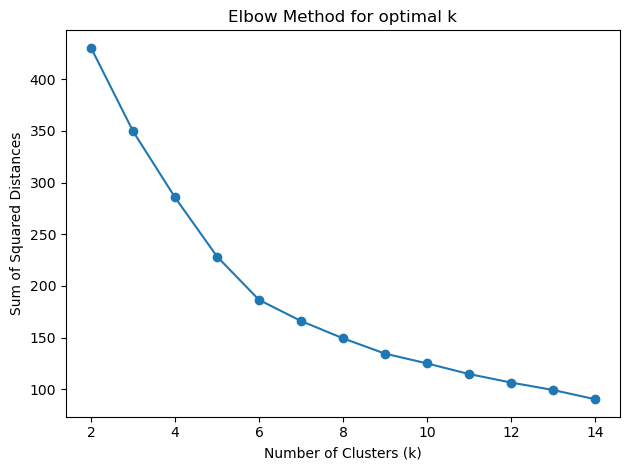

In [16]:
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=10000, n_init=50, random_state=42)
    kmeans.fit(scaler_data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 15), sse, marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
save_fig('Elbow_method', tight_layout=True, fig_extension="png", resolution=300)
plt.show()

The Elbow method calculates the sum of intra-cluster squared distances for each number of clusters used. 
The Silhouette index, in addition to calculating the cohesion, calculates the separation, i.e. it measures how distant a data point is from the nearest cluster points other than its own.

Consequently, it is more complete to use the Silhouette Index to calculate the number of optimal clusters to be included in the K-Means algorithm.

- SILHOUETTE INDEX

In [17]:
silhouette_avg_values=[]
for num_clusters in range(2,15): 
    kmeans = KMeans(n_clusters=num_clusters, max_iter=10000, n_init=50, random_state=42)
    kmeans.fit(scaler_data)

    #obtain cluster labels
    labels = kmeans.labels_

    #calculates the Silhouette Index for the entire dataset after the standardization
    silhouette_avg = silhouette_score(scaler_data, labels)
    silhouette_avg_values.append(silhouette_avg)
    print(f"Silhouette Index: {silhouette_avg}")

Silhouette Index: 0.21565394681709915
Silhouette Index: 0.39607467872662044
Silhouette Index: 0.34941001157797663
Silhouette Index: 0.22573276973276454
Silhouette Index: 0.2566539429455491
Silhouette Index: 0.2289245388889739
Silhouette Index: 0.23247236096962626
Silhouette Index: 0.24472079463353527
Silhouette Index: 0.23509069940396332
Silhouette Index: 0.2018669603669953
Silhouette Index: 0.24725499823834157
Silhouette Index: 0.19681154040813414
Silhouette Index: 0.2228001488889994


Saving figure Silhouette_index


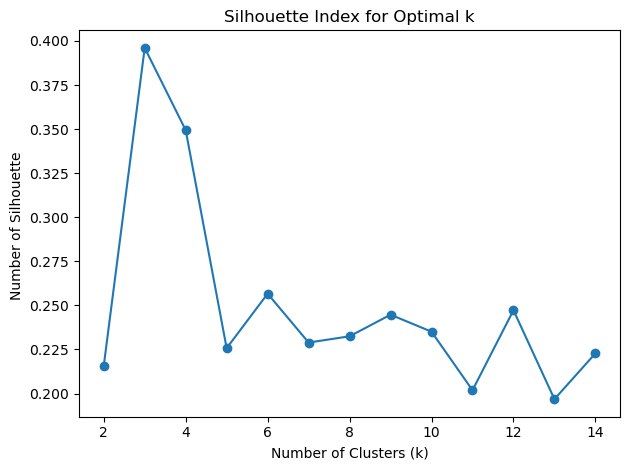

In [18]:
#plot the silhouette graph
plt.plot( range(2,15), silhouette_avg_values, marker='o')
plt.title('Silhouette Index for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Number of Silhouette ')
save_fig('Silhouette_index', tight_layout=True, fig_extension="png", resolution=300)
plt.show()

From the Silhouette index we observe that the optimal number of clusters is 3.

### K-MEANS ALGORITHM

In [19]:
NUM_CLUSTERS = 3
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(scaler_data)
km

KMeans(max_iter=10000, n_clusters=3, n_init=50, random_state=42)

In [20]:
from collections import Counter
Counter(km.labels_)

Counter({1: 75, 2: 9, 0: 5})

In [21]:
dataset['kmeans_cluster'] = km.labels_
dataset

,location,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,stringency_index,population_density,diabetes_prevalence,kmeans_cluster
0,Albania,1.028571,3174.796506,1116.959918,43.606435,104.871,10.08,1
1,Algeria,1.003451,26193.670669,583.324185,51.294016,17.348,6.73,1
2,Argentina,0.969853,104271.513827,2291.167707,52.429133,16.177,5.50,1
3,Australia,1.095496,85935.186597,3282.780552,49.198200,3.202,5.07,1
4,Austria,1.063920,22672.839424,2536.204873,51.823031,106.749,6.35,1
...,...,...,...,...,...,...,...,...
84,Uruguay,1.014990,9160.620829,2676.442872,39.641772,19.751,6.93,1
85,Vietnam,0.942923,315369.846154,3211.927811,56.504951,308.127,6.00,1
86,Yemen,0.701424,1388.116004,41.187970,25.324239,53.508,5.35,2
87,Zambia,0.929969,17481.554688,873.322917,33.488931,22.995,3.94,2


In [22]:
dataset_n['kmeans_cluster'] = km.labels_
dataset_n

,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,stringency_index,population_density,diabetes_prevalence,kmeans_cluster
0,1.028571,3174.796506,1116.959918,43.606435,104.871,10.08,1
1,1.003451,26193.670669,583.324185,51.294016,17.348,6.73,1
2,0.969853,104271.513827,2291.167707,52.429133,16.177,5.50,1
3,1.095496,85935.186597,3282.780552,49.198200,3.202,5.07,1
4,1.063920,22672.839424,2536.204873,51.823031,106.749,6.35,1
...,...,...,...,...,...,...,...
84,1.014990,9160.620829,2676.442872,39.641772,19.751,6.93,1
85,0.942923,315369.846154,3211.927811,56.504951,308.127,6.00,1
86,0.701424,1388.116004,41.187970,25.324239,53.508,5.35,2
87,0.929969,17481.554688,873.322917,33.488931,22.995,3.94,2


In [26]:
cluster_0 = dataset[dataset['kmeans_cluster'] == 0]
save_csv(cluster_0, 'Cluster0', index=False)
cluster_0

Saving CSV file: Cluster0


,location,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,stringency_index,population_density,diabetes_prevalence,kmeans_cluster
5,Bangladesh,1.015385,3.309032e+05,1932.975297,52.142992,1265.036,8.38,0
14,China,1.047751,4.440022e+06,3113.848601,74.515014,147.674,9.74,0
34,India,1.035479,2.066690e+06,1458.296816,60.822505,450.419,10.39,0
50,Malta,0.996030,1.340842e+03,2514.311523,41.758751,1454.037,8.83,0
51,Mauritius,0.548276,2.856050e+03,2197.947598,36.284912,622.962,22.02,0


In [27]:
cluster_1 = dataset[dataset['kmeans_cluster'] == 1]
save_csv(cluster_1, 'Cluster1', index=False)
cluster_1

Saving CSV file: Cluster1


,location,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,stringency_index,population_density,diabetes_prevalence,kmeans_cluster
0,Albania,1.028571,3174.796506,1116.959918,43.606435,104.871,10.08,1
1,Algeria,1.003451,26193.670669,583.324185,51.294016,17.348,6.73,1
2,Argentina,0.969853,104271.513827,2291.167707,52.429133,16.177,5.50,1
3,Australia,1.095496,85935.186597,3282.780552,49.198200,3.202,5.07,1
4,Austria,1.063920,22672.839424,2536.204873,51.823031,106.749,6.35,1
...,...,...,...,...,...,...,...,...
82,United Kingdom,1.056544,247792.797342,3670.495017,44.921831,272.898,4.28,1
83,United States,1.080938,771667.657925,2324.238312,50.641216,35.608,10.79,1
84,Uruguay,1.014990,9160.620829,2676.442872,39.641772,19.751,6.93,1
85,Vietnam,0.942923,315369.846154,3211.927811,56.504951,308.127,6.00,1


In [28]:
cluster_2 = dataset[dataset['kmeans_cluster'] == 2]
save_csv(cluster_2, 'Cluster2', index=False)
cluster_2

Saving CSV file: Cluster2


,location,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,stringency_index,population_density,diabetes_prevalence,kmeans_cluster
7,Benin,0.483072,7152.418803,535.654701,32.701613,99.110,0.99,2
11,Burkina Faso,0.601637,10073.268886,444.271447,21.423271,70.151,2.42,2
19,Djibouti,0.712182,477.625000,426.066372,41.668121,41.285,6.05,2
27,Gambia,0.555368,1953.195946,721.754054,30.171766,207.566,1.91,2
45,Liberia,0.535868,7631.034602,1439.036332,47.066386,49.127,2.42,2
59,Niger,0.792281,8631.992974,329.371194,22.170433,16.955,2.42,2
74,Tanzania,0.161758,67337.175559,1028.055077,14.981216,64.699,5.75,2
86,Yemen,0.701424,1388.116004,41.187970,25.324239,53.508,5.35,2
87,Zambia,0.929969,17481.554688,873.322917,33.488931,22.995,3.94,2


### Discussion

We visualize the clustering of countries considering in particular the value of the stringency index

Saving figure Clustering of the Stringency Index


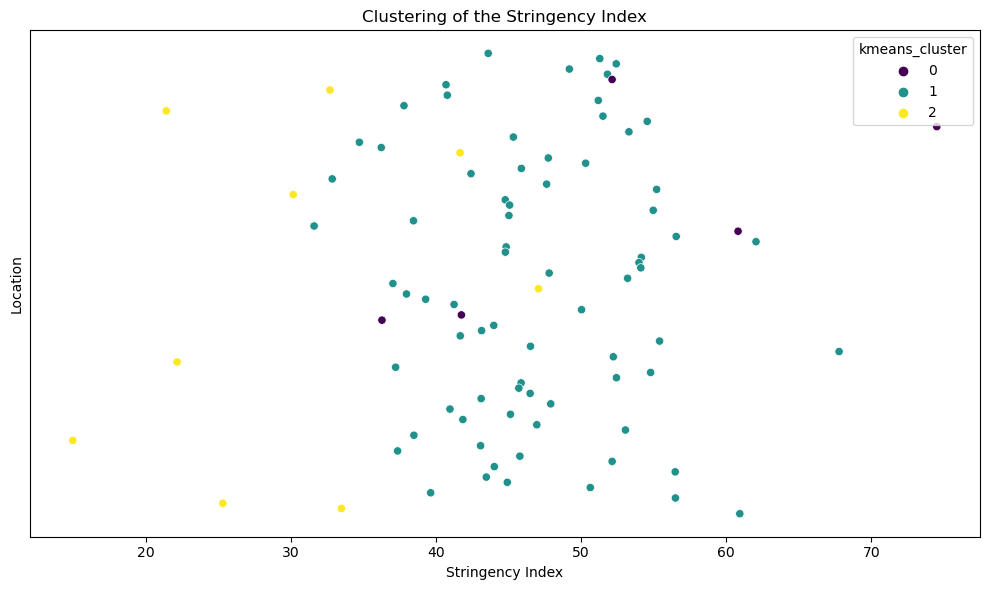

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns  

#selects only the 'location', 'stringency_index', and 'label' columns
data_for_plot = dataset[['location', 'stringency_index', 'kmeans_cluster']]

# Create a scatter plot by colouring points according to clusters
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='stringency_index', y='location', hue='kmeans_cluster', data=data_for_plot, palette='viridis', legend='full')
plt.title('Clustering of the Stringency Index')
plt.xlabel('Stringency Index')
plt.ylabel('Location')
scatter_plot.set_yticks([])
scatter_plot.set_yticklabels([])
save_fig('Clustering of the Stringency Index', tight_layout=True, fig_extension="png", resolution=300)
plt.show()

From this graph, we observe that the countries in cluster 2 (all belonging to Africa) have values between 0 and 50, while clusters 0 and 1 have values all above 30.

In [31]:
#we calculate the means of the features within each cluster
dataset_medie_k = dataset_n.groupby('kmeans_cluster').mean().reset_index()
save_csv(dataset_medie_k, 'Dataset_medie_cluster', index=False)
dataset_medie_k

Saving CSV file: Dataset_medie_cluster


,kmeans_cluster,reproduction_rate,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,stringency_index,population_density,diabetes_prevalence
0,0,0.928584,1.368362e+06,2243.475967,53.104835,788.025600,11.872000
1,1,0.991774,8.357365e+04,2054.844000,46.927160,113.000533,7.046933
2,2,0.608173,1.356960e+04,648.746674,29.888442,69.488444,3.472222


As we see that even for the variables "population density" and "reproduction rate" there is a considerable difference between cluster 2 and clusters 0 and 1, we plot the clustering according to these two variables

Saving figure Clustering of Reproduction rate and Population density


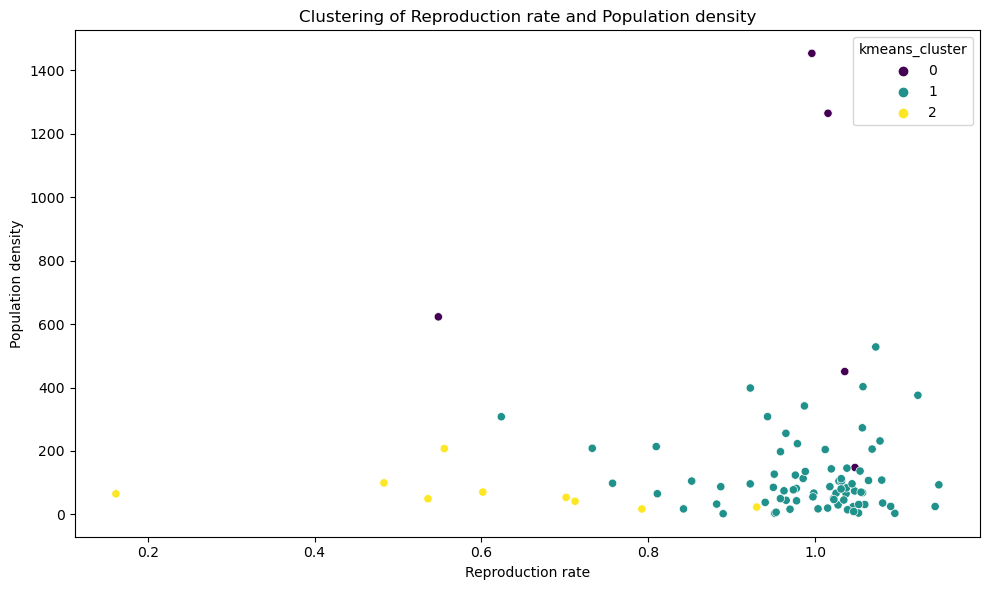

In [32]:
data_for_plot = dataset[['reproduction_rate', 'population_density', 'kmeans_cluster']]
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='reproduction_rate', y='population_density', hue='kmeans_cluster', data=data_for_plot, palette='viridis', legend='full')
plt.title('Clustering of Reproduction rate and Population density')
plt.xlabel('Reproduction rate')
plt.ylabel('Population density')
save_fig('Clustering of Reproduction rate and Population density', tight_layout=True, fig_extension="png", resolution=300)
plt.show()

From the graph, we see that countries for which the population density is higher there is also a higher covid-19 reproduction rate, and on the contrary for countries for which the former is lower, the latter is lower.

Now let us examine the clustering of "reproduction rate" and "new vaccinations smoothed per million", which refers to vaccinations administered per 1,000,000 people.

Saving figure Clustering of Reproduction rate and New vaccinations smoothed per million


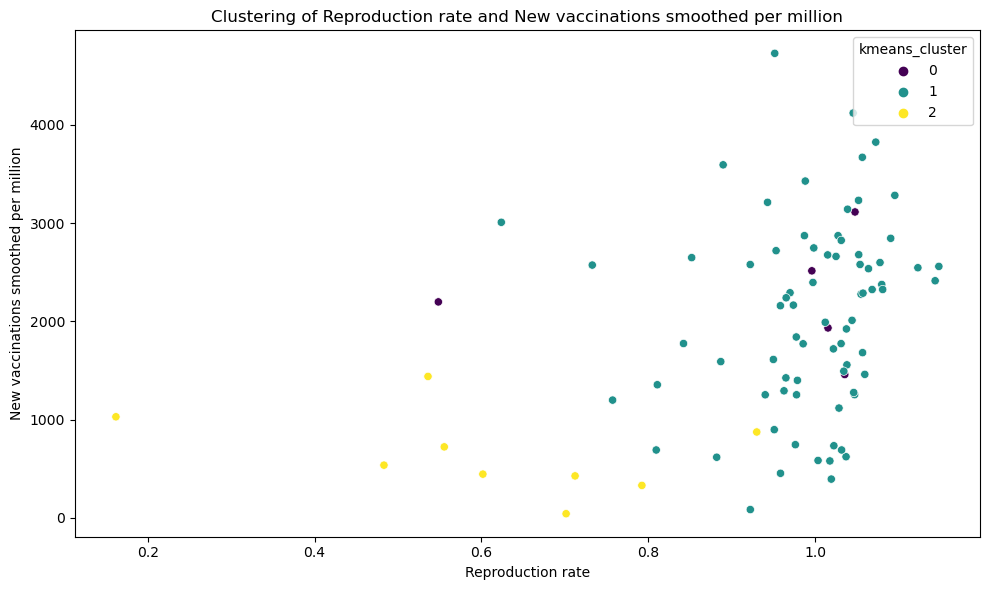

In [33]:
data_for_plot = dataset[['reproduction_rate', 'new_vaccinations_smoothed_per_million', 'kmeans_cluster']]
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='reproduction_rate', y='new_vaccinations_smoothed_per_million', hue='kmeans_cluster', data=data_for_plot, palette='viridis', legend='full')
plt.title('Clustering of Reproduction rate and New vaccinations smoothed per million')
plt.xlabel('Reproduction rate')
plt.ylabel('New vaccinations smoothed per million')
save_fig('Clustering of Reproduction rate and New vaccinations smoothed per million', tight_layout=True, fig_extension="png", resolution=300)
plt.show()

Population density of a country is vital for determining how much the virus can reproduce itself, regardless of the actions which are taken by the Government. 
Cluster 2 has by far the lowest density and also has the lowest reproduction rate, even though it has less vaccinations and less strict stringency policies compared to the other two clusters. 
When considering the first two clusters, which have a comparable reproduction rate of the virus, we must consider both the natural conditions of the countries and the government actions. 
Cluster 0 shows that, even though it has a very high population density, the reproduction rate can be limited with targeted actions. 
In fact, Cluster 1 has a higher reproduction rate compared to cluster 0, even though it has a lower population density. This is because it has less vaccinations and less stringencies compared to cluster 0.